# Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the dataset

In [18]:
df = pd.read_csv("C:/Users/Ayaan/Desktop/Salary_dataset.csv")

# Exploring Data / Insight

In [19]:
print(df.info())  
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


# Cleansing Data 

In [20]:
print("Missing values:\n", df.isnull().sum())  
df.dropna(inplace=True)  

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


# Outlier Detection & Removal (Using IQR)

In [21]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)] 

# Data Transformation (Normalization & Scaling)

In [22]:
scaler = StandardScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Dimensionality Reduction (PCA)

In [23]:
pca = PCA(n_components=1)  
df['YearsExperience_PCA'] = pca.fit_transform(df[['YearsExperience']])

# Feature Selection

In [24]:
selector = SelectKBest(score_func=f_regression, k=1)
X_selected = selector.fit_transform(df[['YearsExperience_PCA']], df['Salary'])

# Splitting Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['Salary'], test_size=0.2, random_state=42)

# Initialize and train model

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predicting on test data

In [27]:
y_pred = model.predict(X_test)

# Model Evaluation

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


MAE: 0.23, MSE: 0.07, RMSE: 0.26, R2 Score: 0.90


# Visualization

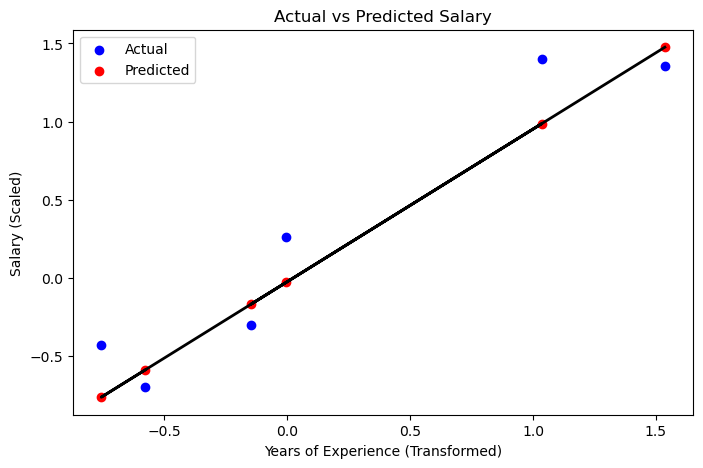

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.xlabel("Years of Experience (Transformed)")
plt.ylabel("Salary (Scaled)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()